In [1]:
from glob import glob
from pprint import pprint as p
import os
import re

whizard_dirs = sorted(glob('../files/output/whizard/mumu_HH_xs_restr_lhe/*'))
p(whizard_dirs)

['../files/output/whizard/mumu_HH_xs_restr/0.4TeV',
 '../files/output/whizard/mumu_HH_xs_restr/0.5TeV',
 '../files/output/whizard/mumu_HH_xs_restr/0.6TeV',
 '../files/output/whizard/mumu_HH_xs_restr/0.7TeV',
 '../files/output/whizard/mumu_HH_xs_restr/0.8TeV',
 '../files/output/whizard/mumu_HH_xs_restr/0.9TeV',
 '../files/output/whizard/mumu_HH_xs_restr/1.0TeV',
 '../files/output/whizard/mumu_HH_xs_restr/10.0TeV',
 '../files/output/whizard/mumu_HH_xs_restr/11.0TeV',
 '../files/output/whizard/mumu_HH_xs_restr/12.0TeV',
 '../files/output/whizard/mumu_HH_xs_restr/13.0TeV',
 '../files/output/whizard/mumu_HH_xs_restr/14.0TeV',
 '../files/output/whizard/mumu_HH_xs_restr/15.0TeV',
 '../files/output/whizard/mumu_HH_xs_restr/16.0TeV',
 '../files/output/whizard/mumu_HH_xs_restr/17.0TeV',
 '../files/output/whizard/mumu_HH_xs_restr/18.0TeV',
 '../files/output/whizard/mumu_HH_xs_restr/19.0TeV',
 '../files/output/whizard/mumu_HH_xs_restr/2.0TeV',
 '../files/output/whizard/mumu_HH_xs_restr/20.0TeV',
 

In [2]:
def extractXS(dirname,logname='mumu_nunuHH.log'):
    xs,xs_err,sqrts=None,None,None
    with open(dirname+'/'+logname) as myfile:
        for line in myfile.readlines():
            if re.search(r'Integral\s*=.*', line):
                xs = re.search(r'\d*\.\d*E[+-]\d+', line).group(0)
                xs=float(xs)
            if re.search(r'Error\s*=.*', line):
                xs_err = re.search(r'\d*\.\d*E[+-]\d+', line).group(0)
                xs_err = float(xs_err)
            if re.search(r'sqrts\s*=.*GeV', line):
                sqrts = re.search(r'\d*\.\d*E[+-]\d+', line).group(0)
                sqrts = float(sqrts)
    return {'xs':xs,'xs_err':xs_err,'sqrts':sqrts}

In [3]:
nunuHH_vals = [extractXS(d, logname='mumu_nunuHH.log') for d in whizard_dirs]
nunuH_vals  = [extractXS(d, logname='mumu_nunuH.log') for d in whizard_dirs]
ZHH_vals    = [extractXS(d, logname='mumu_ZHH.log') for d in whizard_dirs]
ZH_vals     = [extractXS(d, logname='mumu_ZH.log') for d in whizard_dirs]

print(ZHH_vals)


[{'xs': 0.071761123674, 'xs_err': 3.9144774033e-05, 'sqrts': 400.0}, {'xs': 0.15769797107, 'xs_err': 0.00010872392052, 'sqrts': 500.0}, {'xs': 0.17116482645, 'xs_err': 0.00014357442186, 'sqrts': 600.0}, {'xs': 0.16223308539, 'xs_err': 0.00015734218877, 'sqrts': 700.0}, {'xs': 0.14820618972, 'xs_err': 0.00015637479169, 'sqrts': 800.0}, {'xs': 0.13368565107, 'xs_err': 0.00015707660268, 'sqrts': 900.0}, {'xs': 0.12088880495, 'xs_err': 0.00015538627427, 'sqrts': 1000.0}, {'xs': 0.12618169326, 'xs_err': 0.00010357536315, 'sqrts': 10000.0}, {'xs': 0.15098037531, 'xs_err': 0.00010744818433, 'sqrts': 11000.0}, {'xs': 0.17891440351, 'xs_err': 0.00012951381629, 'sqrts': 12000.0}, {'xs': 0.20874438822, 'xs_err': 0.0001305521054, 'sqrts': 13000.0}, {'xs': 0.24144405295, 'xs_err': 0.00014765101797, 'sqrts': 14000.0}, {'xs': 0.27672820774, 'xs_err': 0.00016792219297, 'sqrts': 15000.0}, {'xs': 0.31454042437, 'xs_err': 0.00018440154612, 'sqrts': 16000.0}, {'xs': 0.35461470008, 'xs_err': 0.000197606539

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
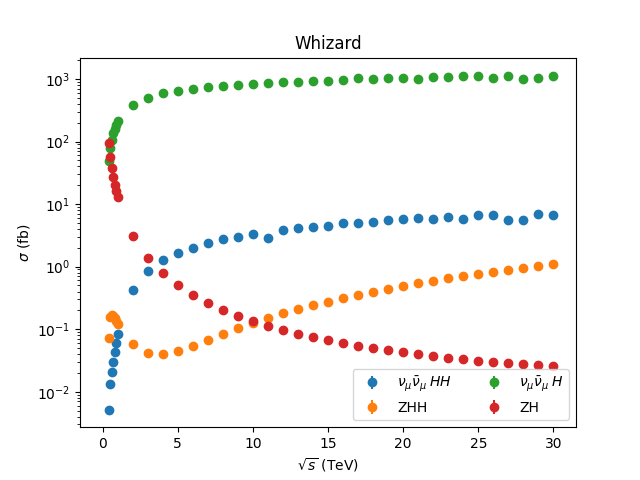

In [4]:
import matplotlib.pyplot as plt
%matplotlib widget
fig=plt.figure()

plt.errorbar([d['sqrts']/1000. for d in nunuHH_vals],
             [d['xs'] for d in nunuHH_vals],
             yerr=[d['xs_err'] for d in nunuHH_vals],
             label='$\\nu_{\\mu}\\bar{\\nu}_{\\mu}\; HH$',
             fmt='o')

plt.errorbar([d['sqrts']/1000. for d in ZHH_vals],
             [d['xs'] for d in ZHH_vals],
             yerr=[d['xs_err'] for d in ZHH_vals],
             label='ZHH',
             fmt='o')

plt.errorbar([d['sqrts']/1000. for d in nunuH_vals],
             [d['xs'] for d in nunuH_vals],
             yerr=[d['xs_err'] for d in nunuH_vals],
             label='$\\nu_{\\mu}\\bar{\\nu}_{\\mu}\; H$',
             fmt='o')

plt.errorbar([d['sqrts']/1000. for d in ZH_vals],
             [d['xs'] for d in ZH_vals],
             yerr=[d['xs_err'] for d in ZH_vals],
             label='ZH',
             fmt='o')

plt.semilogy(True)
plt.xlabel('$\sqrt{s}$ (TeV)')
plt.ylabel('$\sigma$ (fb)')
plt.legend(loc='best',ncol=2)
plt.title('Whizard')

plt.show()